# 31009 - Assignment 1: Regression

Use Linear equation normal equation to predict water temperature T_degC

1. Only use 'Salnty', 'STheta' for predictors
2. Remove NaN / NA values from dataset (prior to building train/test sets). 
3. Solve for rmse, variance explained, and r-squared.

Data for this assignment is called "bottle.csv" and lives within the "data/" directory.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import statsmodels.api as sm

%matplotlib inline

/Users/rowena/miniconda3/envs/msca/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## Read and Clean the Data

In [2]:
df = pd.read_csv('data/bottle.csv')
df = df.loc[:,['Salnty', 'STheta', 'T_degC']]

/Users/rowena/miniconda3/envs/msca/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (47,73) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
print('There are {0} rows in raw dataset\n'.format(len(df)))

print("Remove {0} rows because of missing values in Salnty".format(sum(df.Salnty.isna())))
df = df[~df.Salnty.isna()]

print("Remove {0} rows because of missing values in STheta".format(sum(df.STheta.isna())))
df = df[~df.STheta.isna()]

print("Remove {0} rows because of missing values in T_degC\n".format(sum(df.T_degC.isna())))
df = df[~df.T_degC.isna()]

print("Clean dataset has {0} rows".format(len(df)))

There are 864863 rows in raw dataset

Remove 47354 rows because of missing values in Salnty
Remove 5335 rows because of missing values in STheta
Remove 0 rows because of missing values in T_degC

Clean dataset has 812174 rows


## Exploration of the Data

In [4]:
df.head()

,Salnty,STheta,T_degC
0,33.440,25.649,10.50
1,33.440,25.656,10.46
2,33.437,25.654,10.46
3,33.420,25.643,10.45
4,33.421,25.643,10.45


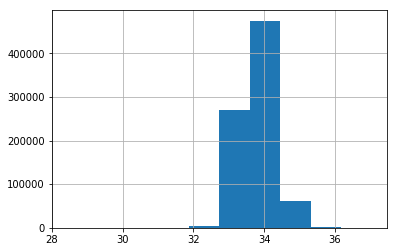

In [5]:
df.Salnty.hist()

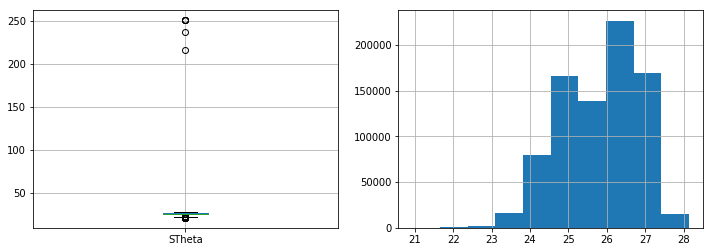

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(12,4))
df.boxplot(column='STheta', ax=ax[0])
df[df.STheta < 50].STheta.hist(ax=ax[1])

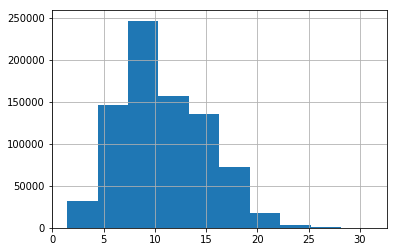

In [7]:
df.T_degC.hist()

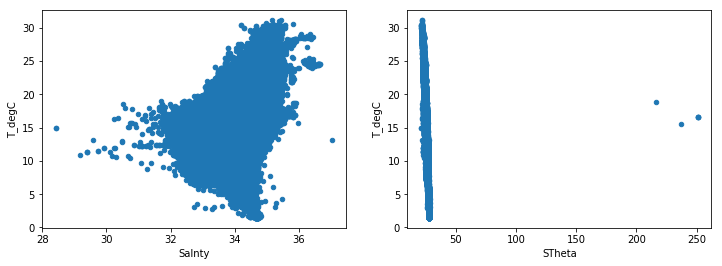

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(12,4))

df.plot(x='Salnty', y='T_degC', ax=ax[0], kind='scatter')
df.plot(x='STheta', y='T_degC', ax=ax[1], kind='scatter')

## Split into Test / Train

In this assignment I am using a 70/30 test/train split

In [9]:
np.random.seed(123)
msk = np.random.rand(len(df)) < 0.7
tn = df[msk]
tt = df[~msk]

## Solving Normal Equation

The normal equation is given by 


\begin{equation}
\theta = (X^T X)^{-1} X^T Y
\end{equation}

where X is a matrix of the predictor values and Y is a vector of the response.

In [10]:
X = tn[tn.columns[0:2]]
# Insert a column of 1s to find an intercept 
X.insert(0, 'intercept', 1)

X_T_inv = np.linalg.pinv(X.T.dot(X))

Y = tn.T_degC

model = X_T_inv.dot(X.T.dot(Y))
model

array([78.71276256,  0.59370174, -3.40673501])

## Computing RMSE, Variance Explained, R-Squared

In [11]:
df.columns

Index(['Salnty', 'STheta', 'T_degC'], dtype='object')

In [12]:
tn_pred = model[0] + model[1] * tn.Salnty + model[2] * tn.STheta
tt_pred = model[0] + model[1] * tt.Salnty + model[2] * tt.STheta

### Root Mean Squared Error

\begin{equation}
RMSE = \sqrt{\frac{\sum_{i=1}^n (\hat y_i - y_i)^2}{n}}
\end{equation}

In [13]:
tn_rmse = (((tn_pred - tn.T_degC)**2).sum() / len(tn))**0.5
tt_rmse = (((tt_pred - tt.T_degC)**2).sum() / len(tt))**0.5

print("Train RSME: {}".format(round(tn_rmse, 2)))
print("Test  RSME: {}".format(round(tt_rmse, 2)))

Train RSME: 2.11
Test  RSME: 2.94


### Variance Explained
Variance explained is the total variance minus the Mean Squared Error of the predictions

In [14]:
tn_var = ((tn.T_degC - tn.T_degC.mean())**2).mean()
tt_var = ((tt.T_degC - tt.T_degC.mean())**2).mean()

print("Train Variance: {}".format(round(tn_var, 2)))
print("Test  Variance: {}".format(round(tt_var, 2)))

Train Variance: 17.8
Test  Variance: 17.86


In [15]:
tn_var_explained = tn_var - tn_rmse**2
tt_var_explained = tt_var - tt_rmse**2

print("Train Variance Explained: {}".format(round(tn_var_explained, 2)))
print("Test  Variance Explained: {}".format(round(tt_var_explained, 2)))

Train Variance Explained: 13.34
Test  Variance Explained: 9.2


### R2

R2 is the percentage of the variance explained out of the total variance

In [16]:
tn_r2 = tn_var_explained / tn_var
tt_r2 = tt_var_explained / tt_var

print("Train R2: {}".format(round(tn_r2, 2)))
print("Test  R2: {}".format(round(tt_r2, 2)))

Train R2: 0.75
Test  R2: 0.51
